In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [40]:
df = pd.read_excel('Enduro 2022 CT HT FT.xlsx')
df.tDateTime = pd.to_datetime(df.tDateTime, utc=True).dt.tz_convert('Asia/Taipei')
#df.set_index('tDateTime', inplace=True)
df.tDateTime = df.tDateTime.dt.date

In [41]:
df.head()

,Reference,ItemNameType,StationID,SerialNumber,ProductName,Version,CT GPS_(L1+L5) by ref,CT GPS_(L1+L5) by ref st,HT GPS_L5 by ref,HT GPS_L5 by ref st,FT GPS_(L1+L5) by ref,FT GPS_(L1+L5) by ref st,tDateTime,Temperature,SO
0,397140021,15832,1,3422037674,ENDURO 2 V08.22,8.22,-0.890001,1,0.0,2,0.0,2,2022-06-24,-9,15955574
1,397140207,15832,1,3422037670,ENDURO 2 V08.22,8.22,0.249999,1,0.0,2,0.0,2,2022-06-24,-9,15955574
2,397140249,15832,3,3422037677,ENDURO 2 V08.22,8.22,-1.790000,1,0.0,2,0.0,2,2022-06-24,-13,15955574
3,397140258,15832,2,3422037699,ENDURO 2 V08.22,8.22,0.739999,1,0.0,2,0.0,2,2022-06-24,-14,15955574
4,397140396,15832,2,3422037704,ENDURO 2 V08.22,8.22,-1.450000,1,0.0,2,0.0,2,2022-06-24,-4,15955574


In [42]:
#df.iloc[:,7] = df.iloc[:,7].map({2:0,5:0,1:1,0:0})
#df.iloc[:,9] = df.iloc[:,9].map({2:0,5:0,1:1,0:0})

In [43]:
#ct = df[(df.ItemNameType == 15832) & (df['CT GPS_(L1+L5) by ref st']==1)]

In [44]:
ct = df[(df.ItemNameType == 15832) & (df['CT GPS_(L1+L5) by ref st'].isin([0,1]))]

In [45]:
ct.groupby('tDateTime')['CT GPS_(L1+L5) by ref'].describe()

,count,mean,std,min,25%,50%,75%,max
tDateTime,,,,,,,,
2022-06-24,235.0,-1.480043,2.081128,-12.870000,-2.600000,-0.970000,0.119998,1.319999
2022-07-06,59.0,0.150677,1.669187,-3.240001,-0.155001,0.169999,0.660000,10.339998
2022-07-12,1093.0,0.443239,0.670591,-6.420000,0.250000,0.530001,0.790001,1.580000
2022-07-13,1112.0,0.464838,0.745314,-5.879999,0.260001,0.575000,0.870001,1.839999
2022-07-20,1487.0,0.877101,0.499385,-3.669999,0.639999,0.959999,1.219998,2.199999
2022-07-21,600.0,0.878300,0.520801,-1.579999,0.594999,0.910001,1.219999,2.760000


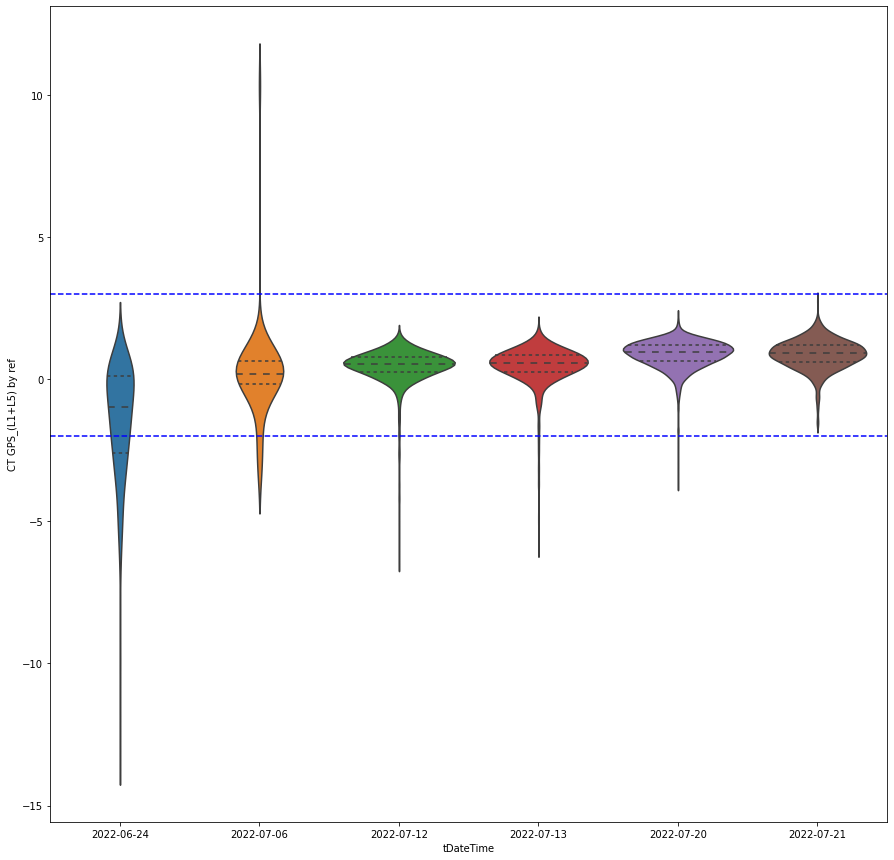

In [46]:
plt.figure(figsize=(15,15))
sns.violinplot(data=ct, x='tDateTime',y='CT GPS_(L1+L5) by ref',inner='quartile')
plt.axhline(3, ls='--', color='blue')
plt.axhline(-2, ls='--', color='blue')

In [47]:
#ct_resample = ct.resample(rule='d')['CT GPS_(L1+L5) by ref st'].agg(['sum','count'])
#ct_resample['yield'] = 100*(ct_resample['sum'] / ct_resample['count'])
#ct_resample.dropna()

In [48]:
ht = df[(df.ItemNameType == 15833) & (df['HT GPS_L5 by ref st'].isin([0,1]))]

In [49]:
#ht_resample = ht.resample(rule='d')['HT GPS_L5) by ref st'].agg(['sum','count'])
#ht_resample['yield'] = 100*(ht_resample['sum'] / ht_resample['count'])
#ht_resample.dropna()

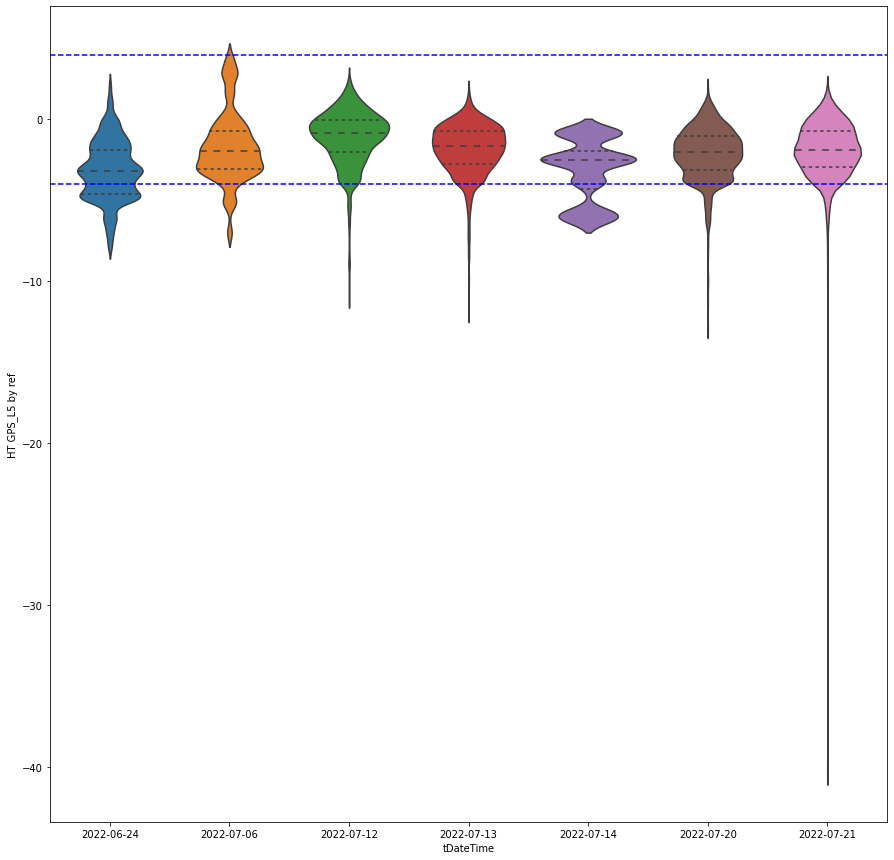

In [50]:
plt.figure(figsize=(15,15))
sns.violinplot(data=ht, x='tDateTime',y='HT GPS_L5 by ref', bw=0.2,inner='quartile')
plt.axhline(4, ls='--', color='blue')
plt.axhline(-4, ls='--', color='blue')

In [51]:
ht.groupby('tDateTime')['HT GPS_L5 by ref'].describe()

,count,mean,std,min,25%,50%,75%,max
tDateTime,,,,,,,,
2022-06-24,170.0,-3.162471,1.846832,-7.86,-4.5900,-3.215,-1.8700,2.07
2022-07-06,56.0,-1.682857,2.195970,-6.99,-3.0825,-1.975,-0.7050,3.81
2022-07-12,1010.0,-1.123891,1.702261,-10.95,-2.0375,-0.850,-0.0125,2.52
2022-07-13,1251.0,-1.845580,1.563322,-11.89,-2.7250,-1.660,-0.7200,1.76
2022-07-14,8.0,-3.097500,2.025451,-6.18,-4.2975,-2.535,-1.9525,-0.77
2022-07-20,1396.0,-2.138453,1.598301,-12.86,-3.1400,-2.040,-1.0400,1.87
2022-07-21,781.0,-1.913419,2.074741,-40.25,-2.9300,-1.860,-0.7000,1.85


FT

In [52]:
ft = df[(df.ItemNameType == 15834) & (df['FT GPS_(L1+L5) by ref st'].isin([0,1]))].sort_values('tDateTime')

In [53]:
ft

,Reference,ItemNameType,StationID,SerialNumber,ProductName,Version,CT GPS_(L1+L5) by ref,CT GPS_(L1+L5) by ref st,HT GPS_L5 by ref,HT GPS_L5 by ref st,FT GPS_(L1+L5) by ref,FT GPS_(L1+L5) by ref st,tDateTime,Temperature,SO
8435,397475945,15834,3,3422037851,ENDURO 2 V08.22,8.22,-0.32,1,675.0,1,-0.509998,1,2022-06-27,23,15955605
8534,397489117,15834,2,3422037664,ENDURO 2 V08.22,8.22,-0.33,1,658.0,1,-0.860001,1,2022-06-27,26,15955574
8535,397489155,15834,3,3422037703,ENDURO 2 V08.22,8.22,-2.76,1,620.0,1,-2.989998,1,2022-06-27,26,15955574
8536,397489200,15834,4,3422037758,ENDURO 2 V08.22,8.22,-1.89,1,670.0,1,-1.880000,1,2022-06-27,28,15959824
8537,397489221,15834,3,3422037727,ENDURO 2 V08.22,8.22,-0.37,1,724.0,1,-0.570001,1,2022-06-27,26,15959824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12978,400759400,15834,5,3425246806,ENDURO 2 V08.40,8.40,0.19,1,791.0,1,0.459998,1,2022-07-21,24,15976098
12977,400759362,15834,4,3425246604,ENDURO 2 V08.40,8.40,-0.35,1,680.0,1,-0.199998,1,2022-07-21,24,15976098
12974,400759329,15834,1,3425246940,ENDURO 2 V08.40,8.40,0.34,1,1846.0,1,-0.009998,1,2022-07-21,23,15976098
12988,400759611,15834,4,3425246509,ENDURO 2 V08.40,8.40,0.07,1,729.0,1,0.130002,1,2022-07-21,24,15976098


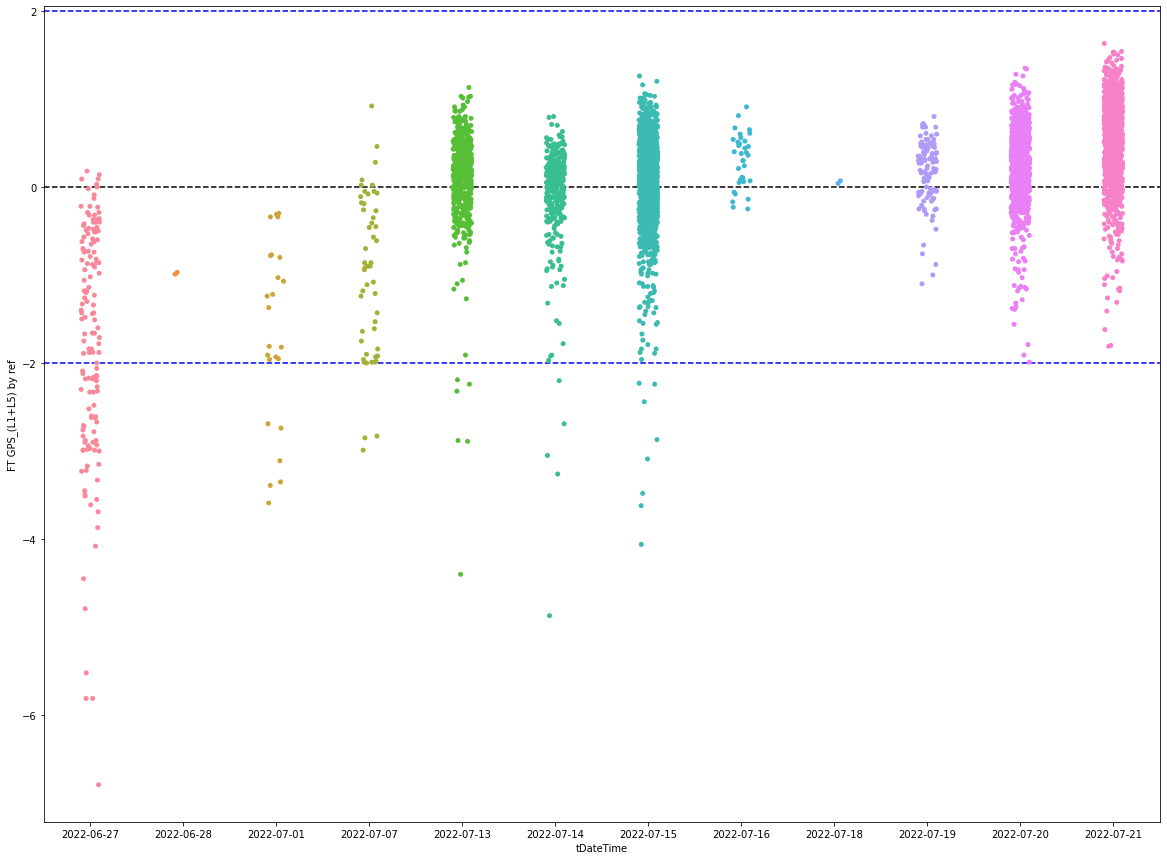

In [64]:
plt.figure(figsize=(20,15))
sns.stripplot(data=ft, x='tDateTime',y='FT GPS_(L1+L5) by ref')
plt.axhline(2, ls='--', color='blue')
plt.axhline(-2, ls='--', color='blue')
plt.axhline(0, ls='--', color='black')

In [63]:
ft.groupby('tDateTime')['FT GPS_(L1+L5) by ref'].describe()

,count,mean,std,min,25%,50%,75%,max
tDateTime,,,,,,,,
2022-06-27,145.0,-1.755448,1.338866,-6.790000,-2.670000,-1.599998,-0.619998,0.179999
2022-06-28,2.0,-0.980000,0.014142,-0.990000,-0.985000,-0.980000,-0.975000,-0.970000
2022-07-01,24.0,-1.659167,1.040974,-3.590001,-2.142501,-1.589999,-0.794999,-0.299999
2022-07-07,51.0,-0.987450,0.905728,-2.990002,-1.794999,-0.900000,-0.225000,0.920002
2022-07-13,560.0,0.109089,0.495327,-4.399999,-0.110000,0.170000,0.400001,1.130001
2022-07-14,314.0,-0.099904,0.596606,-4.870000,-0.237500,0.010000,0.217500,0.799999
2022-07-15,1313.0,0.050168,0.528100,-4.060000,-0.200000,0.110002,0.390002,1.260002
2022-07-16,34.0,0.304707,0.302216,-0.249999,0.072501,0.370001,0.517501,0.910001
2022-07-18,2.0,0.055001,0.021213,0.040001,0.047501,0.055001,0.062501,0.070001
